# Actividad 1


### 1: Utilizar el dataset Iris que se puede cargar automáticamente con la biblioteca sklearn.datasets

In [1]:
import sklearn
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target
print (X.shape, Y.shape)

labels = ["Setosa","Versicolour", "Virginica"]
colors = ["red","blue","green"]

(150, 4) (150,)


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
#Función de utilidad para dibujar subclases
def plot_scatter_classes(X, Y, labels, colors):
    C = []
    for label in labels:
        selection = Y==label
        C.append(X[selection])
    for idx, subset in enumerate(C):
        plt.scatter(subset[:,0], subset[:,1], color=colors[idx], label=labels[idx])
    plt.legend()

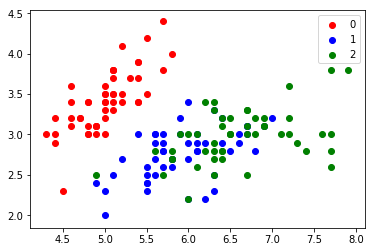

In [3]:
plot_scatter_classes(X, Y, [0,1,2], colors)

## 2: Utilizar varias configuraciones (al menos tres) del clasificador SVC, evaluarlas y compararlas sin hacer validación cruzada.

Vamos a utilizar tres tipos de kernel del clasificador SVC: 
- Linear
- Rbf
- Polynomial

___Linear:___

Para este modelo vamos a cargar el modelo, entrenar con todo su set de datos y testearlo con lo mismo.

In [4]:
#importando el modelo
from sklearn.svm import SVC
#instanciando el modelo
model =SVC(kernel="linear")
#entrenando el modelo
predict_svc = model.fit(X,Y);
#realizando la prediccion
y_predict  =  predict_svc.predict(X)

Evaluo el modelo, para esto utilizamos el objeto de metricas para evaluar distintas metricas de nuestro modelo.

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [6]:
#Matriz de confusion
confusion_matrix(y_true= Y, y_pred= y_predict)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]], dtype=int64)

In [7]:
print("Score del modelo: ", model.score(X, Y))
print("Accuracy del modelo: ", accuracy_score(y_true= Y, y_pred= y_predict))

Score del modelo:  0.993333333333
Accuracy del modelo:  0.993333333333


### Conclusiones
Esta bueno

___RBF:___

Para este modelo con la configuración RBF vamos a entrenar y testearlo el modelo con todo su set de datos.

In [8]:
#importando el modelo
from sklearn.svm import SVC
#instanciando el modelo  , rbf es el valor por defecto del SVC
model =SVC(kernel="rbf")
#entrenando el modelo
predict_svc = model.fit(X,Y);
#realizando la prediccion
y_predict  =  predict_svc.predict(X)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [10]:
confusion_matrix(y_true= Y, y_pred= y_predict)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  0, 50]], dtype=int64)

In [11]:
print("Score del modelo: ",model.score(X, Y))
print("Accuracy del modelo: ", accuracy_score(y_true= Y, y_pred= y_predict))

Score del modelo:  0.986666666667
Accuracy del modelo:  0.986666666667


### Conclusiones
esta mejor el anterior

___POLY:___

Para este modelo con la configuración Poly vamos a entrenar y testearlo el modelo con todo su set de datos.

In [12]:
#importando el modelo
from sklearn.svm import SVC
#instanciando el modelo
model =SVC(kernel="poly")
#entrenando el modelo
predict_svc = model.fit(X,Y);
#realizando la prediccion
y_predict  =  predict_svc.predict(X)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [14]:
confusion_matrix(y_true= Y, y_pred= y_predict)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [15]:
print("Score del modelo: ",model.score(X, Y))
print("Accuracy del modelo: ", accuracy_score(y_true= Y, y_pred= y_predict))

Score del modelo:  0.98
Accuracy del modelo:  0.98


### Conclusiones
linear va ganando

## 3:  Tomar las configuraciones elegidas anteriormente y volver a entrenarlas y evaluarlas utilizando validación cruzada.

vamos a segmentar nuestra data, para poder sacar una data de muestra, y sobre dataset testearla.

In [37]:
#from sklearn import cross_validation
#X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.3, random_state=0)
# cambio de libreria cross_validation por model_selection, debido a que se dejara de usar
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection .train_test_split(X, Y, test_size=0.35, random_state=0)

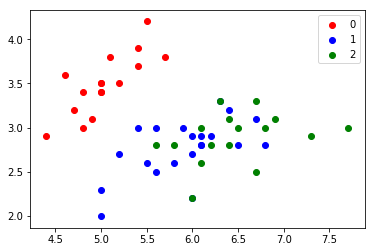

In [38]:
#pintamos la distribucion del dataset de test, para validar que no existan posibles problemas
plot_scatter_classes(X_test, y_test, [0,1,2], ["red", "blue", "green"])

In [39]:
#importando el modelo
from sklearn.svm import SVC
#instanciando el modelo
model_linear =SVC(kernel="linear")
model_rbf =SVC(kernel="rbf")
model_poly =SVC(kernel="poly")
#entrenando el modelo
predict_svc_linear = model_linear.fit(X_train,y_train);
predict_svc_rbf = model_rbf.fit(X_train,y_train);
predict_svc_poly = model_poly.fit(X_train,y_train);
#realizando la prediccion
y_predict_linear  =  predict_svc_linear.predict(X_test)
y_predict_rbf  =  predict_svc_rbf.predict(X_test)
y_predict_poly  =  predict_svc_poly.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
print("SVC - Linear : ")
print(confusion_matrix(y_true= y_test, y_pred= y_predict_linear))
print("Score del modelo: ",model_linear.score(X_test, y_predict_linear))
print("==================")
print("SVC - Rbf : ")
print(confusion_matrix(y_true= y_test, y_pred= y_predict_rbf))
print("Score del modelo: ",model_rbf.score(X_test, y_predict_rbf))
print("==================")
print("SVC - Poly : ")
print(confusion_matrix(y_true= y_test, y_pred= y_predict_poly))
print("Score del modelo: ",model_poly.score(X_test, y_predict_poly))

SVC - Linear : 
[[16  0  0]
 [ 0 20  1]
 [ 0  0 16]]
Score del modelo:  1.0
SVC - Rbf : 
[[16  0  0]
 [ 0 20  1]
 [ 0  0 16]]
Score del modelo:  1.0
SVC - Poly : 
[[16  0  0]
 [ 0 20  1]
 [ 0  1 15]]
Score del modelo:  1.0


In [27]:
print("Score del modelo: ",model.score(y_test, y_predict))
print("Accuracy del modelo: ", accuracy_score(y_true= y_test, y_pred= y_predict))

ValueError: Expected 2D array, got 1D array instead:
array=[ 2.  1.  0.  2.  0.  2.  0.  1.  1.  1.  2.  1.  1.  1.  1.  0.  1.  1.
  0.  0.  2.  1.  0.  0.  2.  0.  0.  1.  1.  0.  2.  1.  0.  2.  2.  1.
  0.  1.  1.  1.  2.  0.  2.  0.  0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

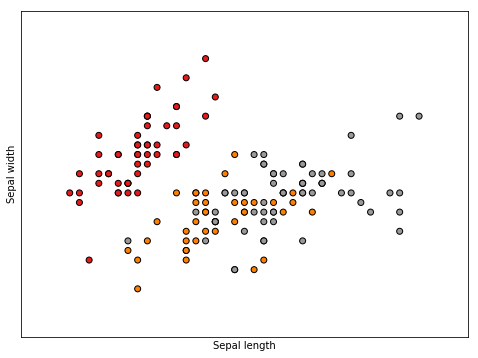

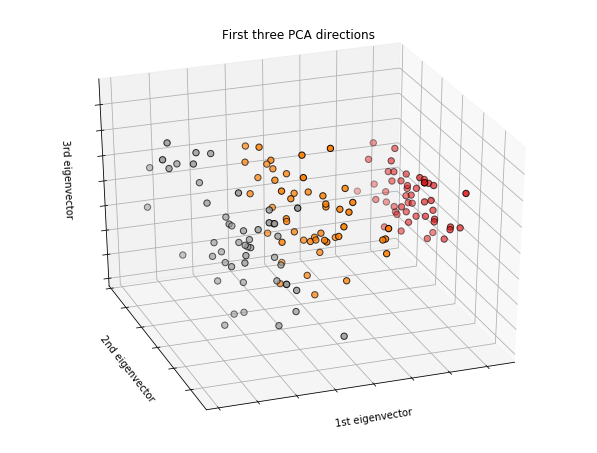

In [91]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

y = Y
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

Como visualizar los 4 de las caracteristicas del modelo:

http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py

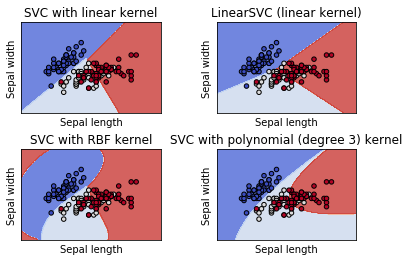

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()